In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Nikhil\\Desktop\\Project\\landsat_analysis_results.csv")
labels = ['Water (%)', 'Coal (%)', 'Crop (%)', 'Forest (%)', 'Urban (%)']

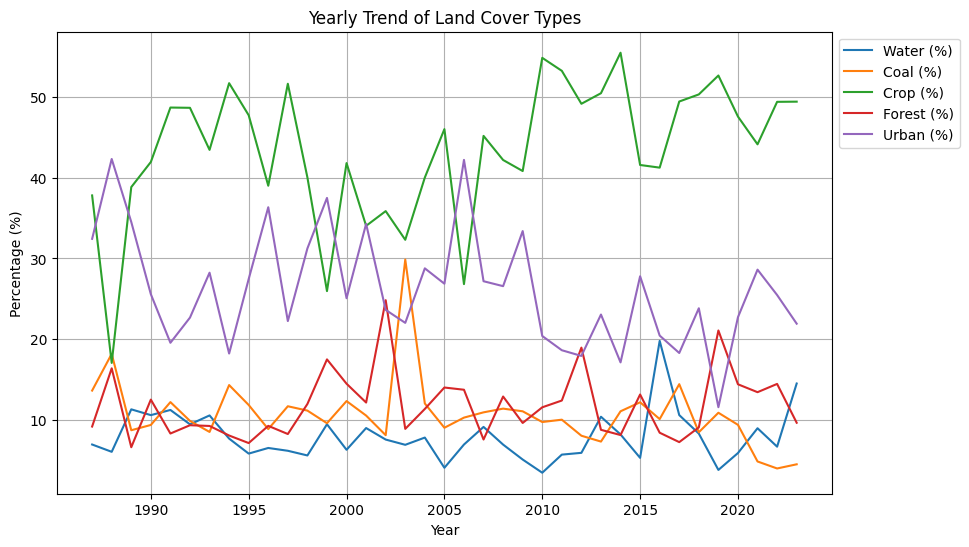

In [3]:
# Plot trend of each class over the years
df.plot(x='Year', y=labels, figsize=(10, 6))
plt.title('Yearly Trend of Land Cover Types')
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.grid(True)
plt.show()

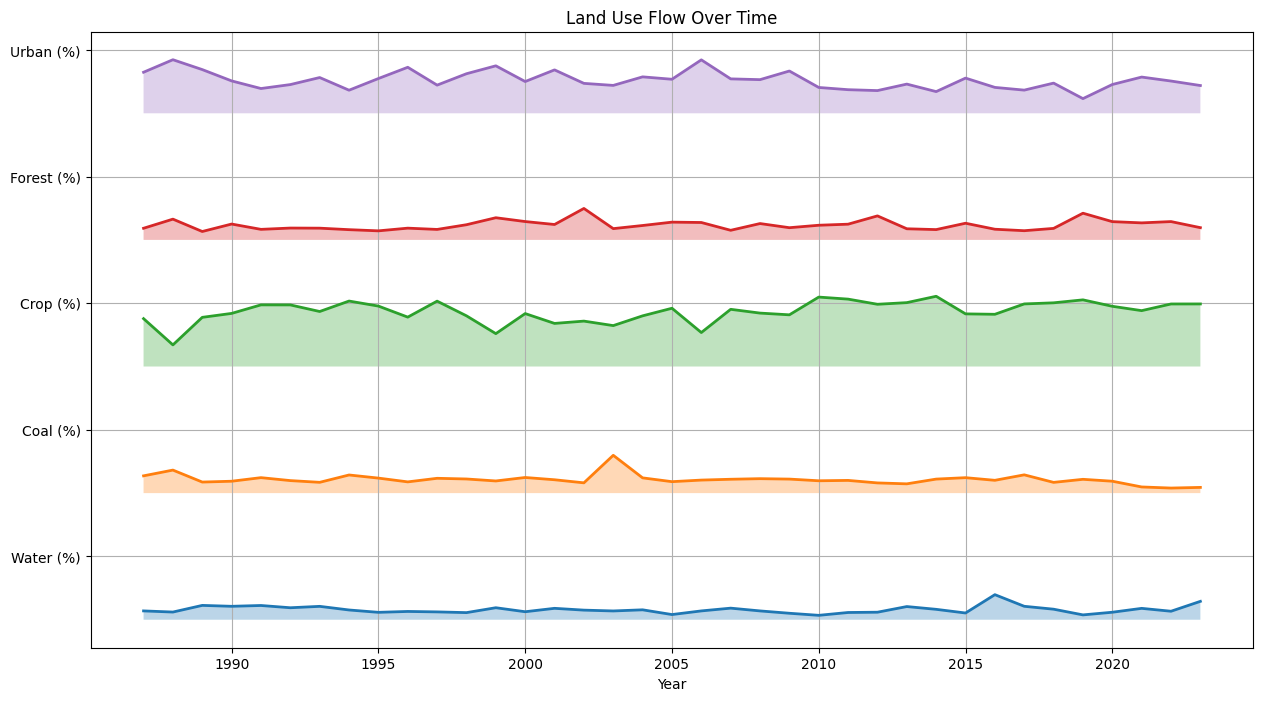

In [4]:
# Create subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each feature
for i, feature in enumerate(labels):
    ax.plot(df['Year'], df[feature] + i * 100, linewidth=2, label=labels)
    ax.fill_between(df['Year'], i * 100, df[feature] + i * 100, alpha=0.3)

ax.set_yticks(np.arange(len(labels)) * 100 + 50)
ax.set_yticklabels(labels)
ax.set_title('Land Use Flow Over Time')
ax.set_xlabel('Year')
ax.grid(True)

plt.show()


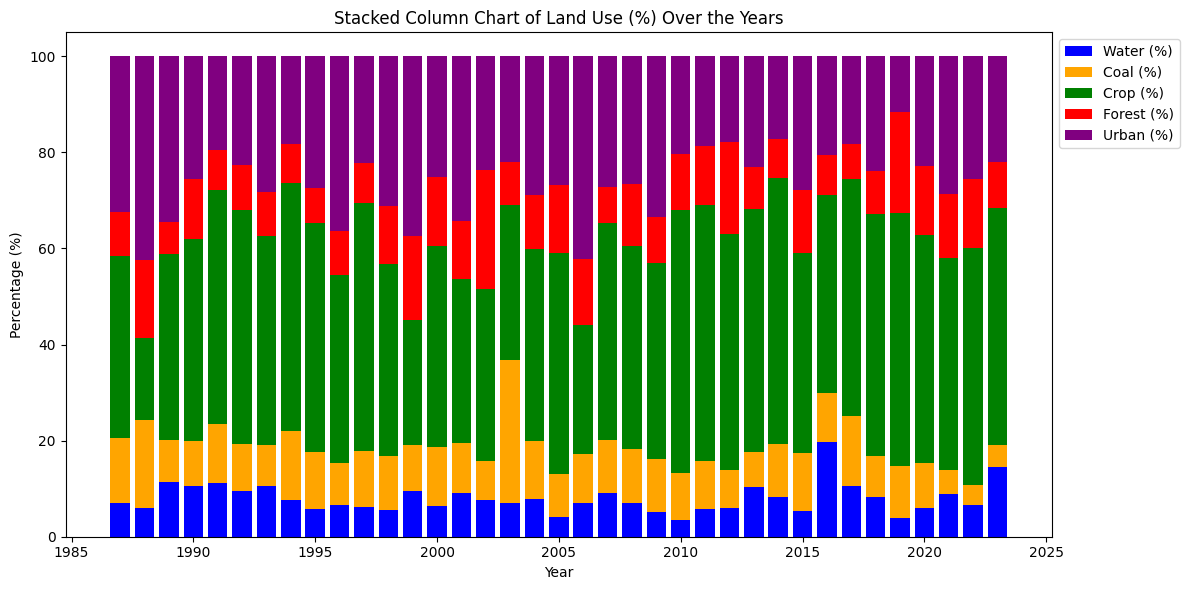

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('landsat_analysis_results.csv')

# Plot the stacked column chart
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Water (%)'], label='Water (%)', color='blue', bottom=0)
plt.bar(df['Year'], df['Coal (%)'], label='Coal (%)', color='orange', bottom=df['Water (%)'])
plt.bar(df['Year'], df['Crop (%)'], label='Crop (%)', color='green', bottom=df['Water (%)'] + df['Coal (%)'])
plt.bar(df['Year'], df['Forest (%)'], label='Forest (%)', color='red', bottom=df['Water (%)'] + df['Coal (%)'] + df['Crop (%)'])
plt.bar(df['Year'], df['Urban (%)'], label='Urban (%)', color='purple', bottom=df['Water (%)'] + df['Coal (%)'] + df['Crop (%)'] + df['Forest (%)'])

# Add labels and title
plt.title('Stacked Column Chart of Land Use (%) Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Show the legend
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


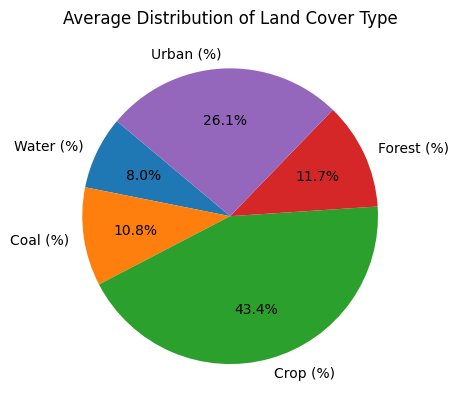

Average Percentage of Each Land Cover Type:
Water (%)      7.972377
Coal (%)      10.776985
Crop (%)      43.407317
Forest (%)    11.736905
Urban (%)     26.106417
dtype: float64


In [6]:
# Calculate the average for each land cover type
df
temp_df=df.drop(columns=['Year'])
averages = temp_df.mean()

# #Plots the average each land cover type
plt.pie(averages,labels=labels,autopct='%1.1f%%',pctdistance=0.65,startangle=140)
plt.title('Average Distribution of Land Cover Type')
plt.show()

# Display the averages
print("Average Percentage of Each Land Cover Type:")
print(averages)

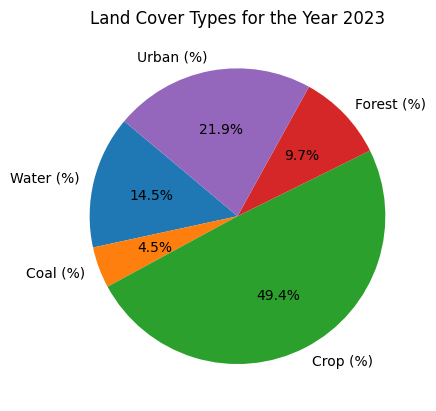

In [7]:
# Select a specific year
varsh=19870
if varsh<1987:
    varsh=1987
elif varsh>2023:
    varsh=2023
year = df[df['Year'] == varsh]
year=year.drop(columns=['Year'])
year=year.iloc[0].to_numpy()

# Pie chart of proportions for that year
plt.pie(year,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title(f'Land Cover Types for the Year {varsh}')
plt.show()


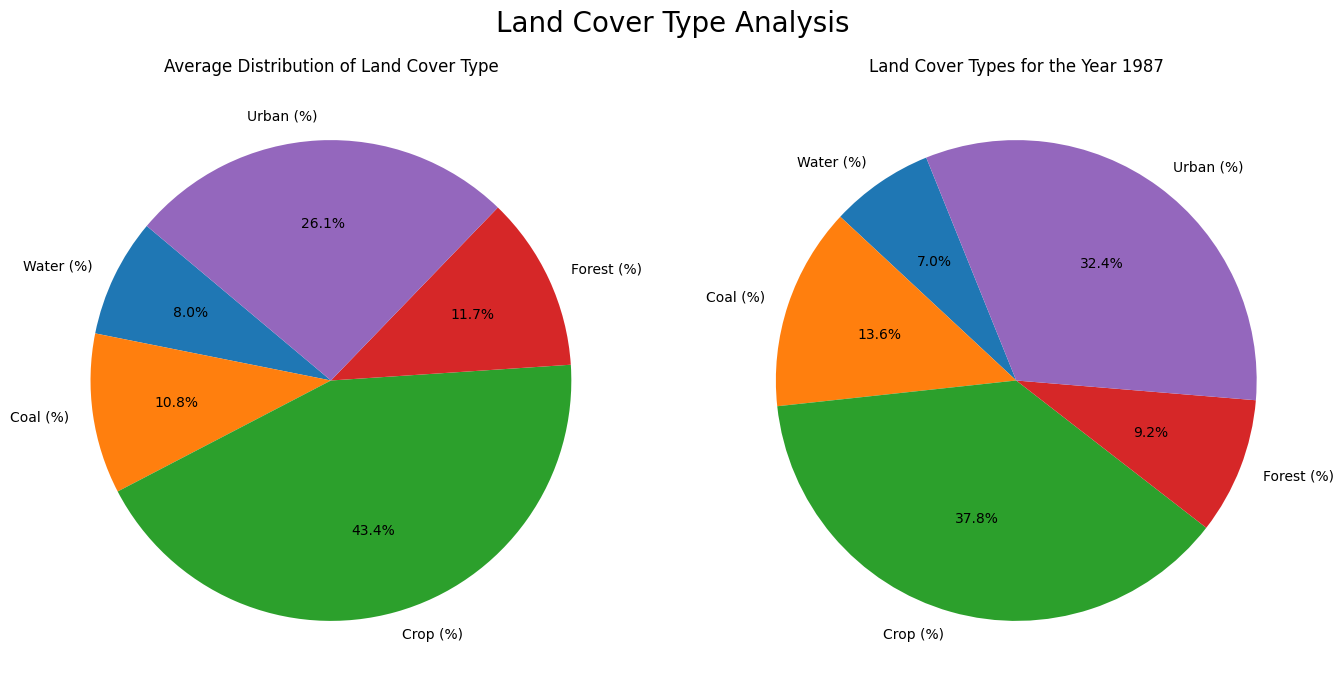

In [8]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

# Calculate the average for each land cover type
temp_df = df.drop(columns=['Year'])
averages = temp_df.mean()
# Plot the average distribution pie chart
ax1.pie(averages, labels=labels, autopct='%1.1f%%', pctdistance=0.65, startangle=140)
ax1.set_title('Average Distribution of Land Cover Type')

# Select a specific year
varsh=1987
if varsh<1987:
    varsh=1987
elif varsh>2023:
    varsh=2023
year = df[df['Year'] == varsh]
year = year.drop(columns=['Year'])
year = year.iloc[0].to_numpy()
# Plot the pie chart for the specific year
ax2.pie(year, labels=labels, autopct='%1.1f%%', startangle=112)
ax2.set_title(f'Land Cover Types for the Year {varsh}')

# Add an overall title
fig.suptitle('Land Cover Type Analysis', fontsize=20)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(top=0.88)  # Adjust the top parameter to reduce the gap

# Show the plot
plt.show()

In [9]:
# # Calculate the percentage change for each land cover type
# df_change = df.set_index('Year').pct_change() * 100

# # Plot percentage change for each class
# df_change.plot(y=['Water (%)', 'Coal (%)', 'Crop (%)', 'Forest (%)', 'Urban (%)'], figsize=(10, 6))
# plt.title('Percentage Change of Land Cover Types Over Time')
# plt.ylabel('Percentage Change (%)')
# plt.xlabel('Year')
# plt.legend(loc='upper right')
# plt.grid(True)
# plt.show()


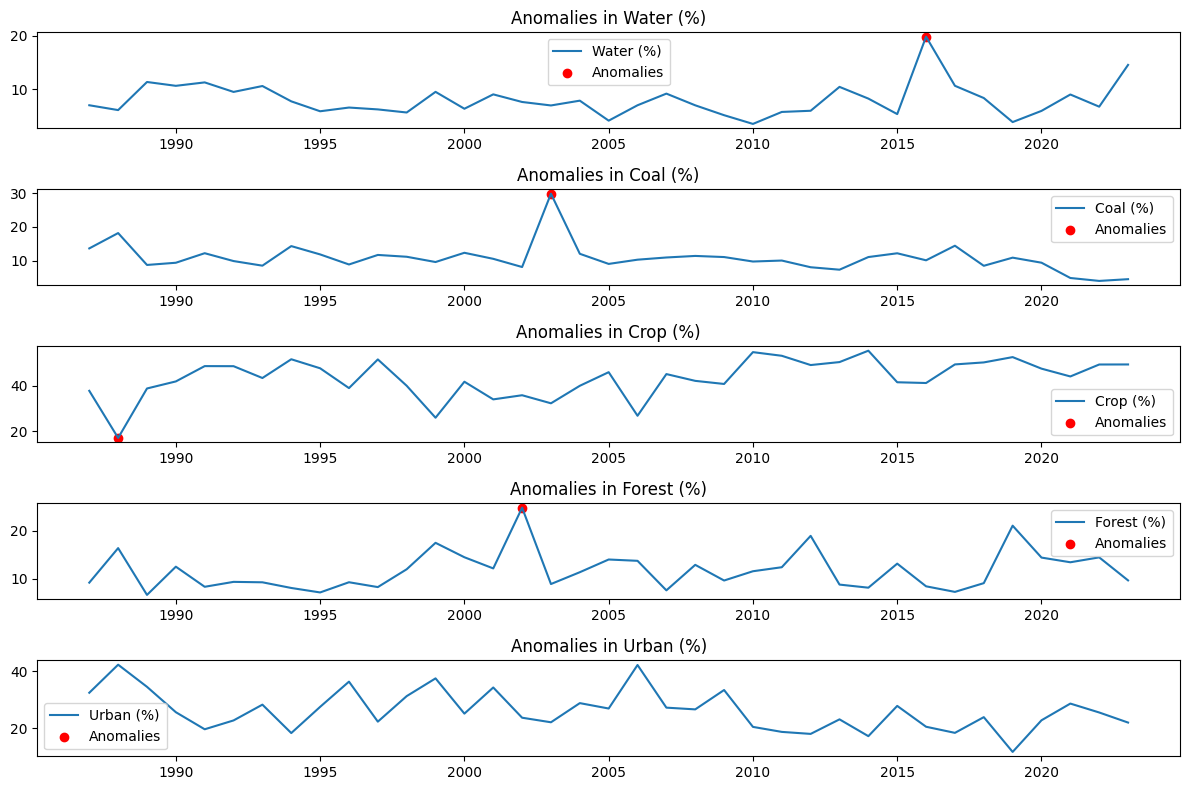

In [10]:
    plt.figure(figsize=(12, 8))
    for i, land_type in enumerate(labels, 1):
        plt.subplot(len(labels), 1, i)
        
        # Calculate Z-scores
        z_scores = np.abs(stats.zscore(df[land_type]))
        anomalies = df[z_scores > 3]
        
        plt.plot(df['Year'], df[land_type], label=land_type)
        plt.scatter(anomalies['Year'], anomalies[land_type], color='red', label='Anomalies')
        
        plt.title(f'Anomalies in {land_type}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


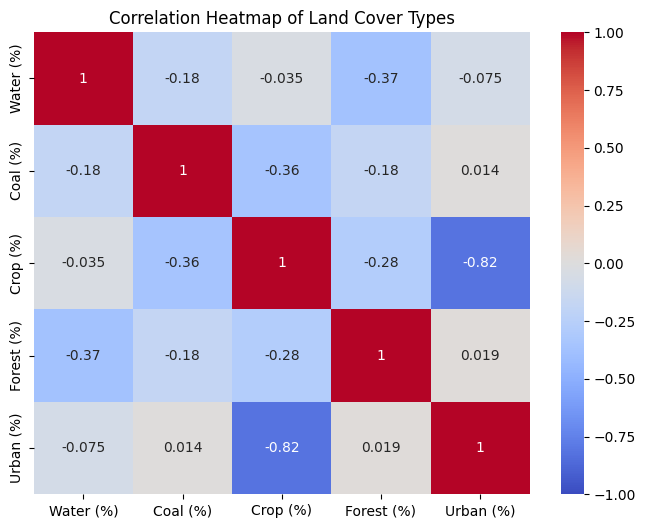

In [11]:


# Calculate the correlation between different land cover types
correlation_matrix = df[labels].corr()

# print("Correlation Between Land Cover Types:")
# print(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Land Cover Types')
plt.show()


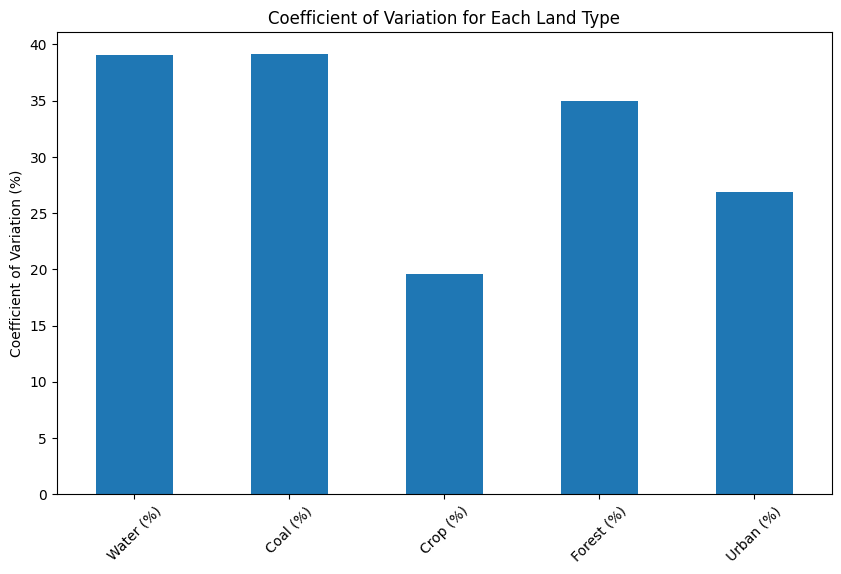

In [12]:

# Calculate coefficient of variation for each land type
cv = df[labels].std() / df[labels].mean() * 100

plt.figure(figsize=(10, 6))
cv.plot(kind='bar')
plt.title('Coefficient of Variation for Each Land Type')
plt.ylabel('Coefficient of Variation (%)')
plt.xticks(rotation=45)
plt.show()

<Figure size 900x500 with 0 Axes>

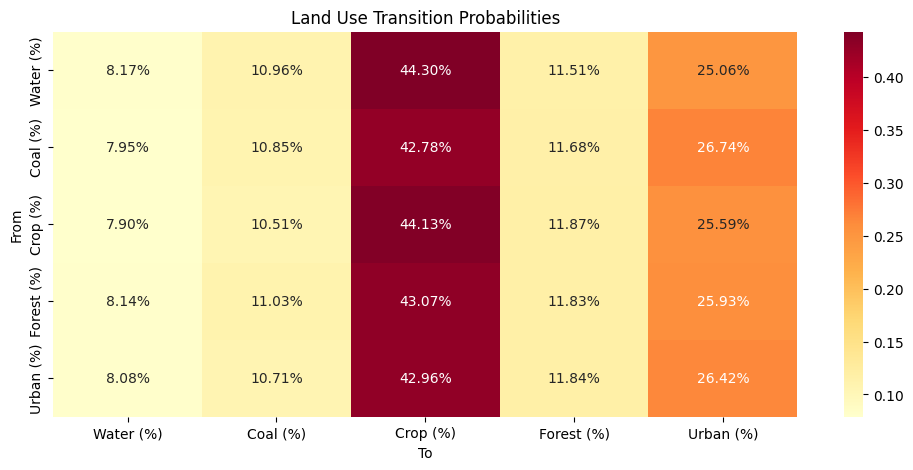

In [13]:
    transitions = np.zeros((len(labels), len(labels)))
    plt.figure(figsize=(9,5))
    for i in range(len(df) - 1):
        current = df.iloc[i][labels].values.astype(float)
        next = df.iloc[i+1][labels].values.astype(float)
        transitions += np.outer(current, next)
    
    row_sums = transitions.sum(axis=1, keepdims=True)
    transitions_normalized = np.where(row_sums != 0, transitions / row_sums, 0)
    
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.heatmap(transitions_normalized, annot=True, fmt='.2%', cmap='YlOrRd', 
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title('Land Use Transition Probabilities')
    ax.set_xlabel('To')
    ax.set_ylabel('From')
    plt.show()